# Price Range Analysis

### step 1: importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step 2: loading the dataset

In [2]:
df= pd.read_csv(r'C:\machine-learning\cognifyz-internship\Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (9551, 21)


### step 3: handling missing values

In [5]:
print("\nMissing values per column:")
df.isnull().sum()




Missing values per column:


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.dropna(inplace=True)
print("\nDataset shape after dropping missing values:", df.shape)


Dataset shape after dropping missing values: (9542, 21)


### step 4: determinig the most common price range

In [7]:
price_count = df['Price range'].value_counts(normalize=True) * 100
print("\nPrice range distribution:")
print(price_count)


Price range distribution:
Price range
1    46.510166
2    32.624188
3    14.724376
4     6.141270
Name: proportion, dtype: float64


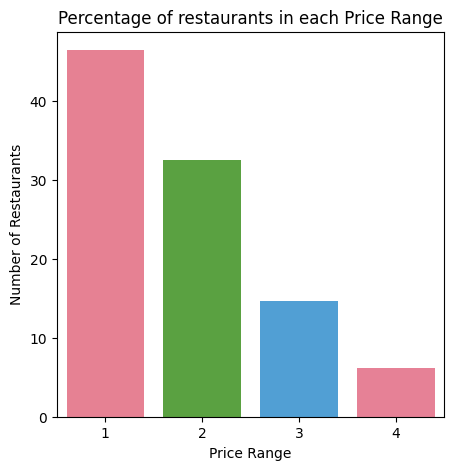

In [31]:
plt.figure(figsize=(5, 5))
sns.barplot(x=price_count.index, y=price_count.values, palette='husl', hue=price_count.index, legend=False)
plt.title('Percentage of restaurants in each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

### step 5: calculating average rating for each price range

In [33]:
ar_byprice = df.groupby('Price range')['Aggregate rating'].mean().round(2)
print("\nAverage rating by Price Range:")
print(ar_byprice)


Average rating by Price Range:
Price range
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregate rating, dtype: float64


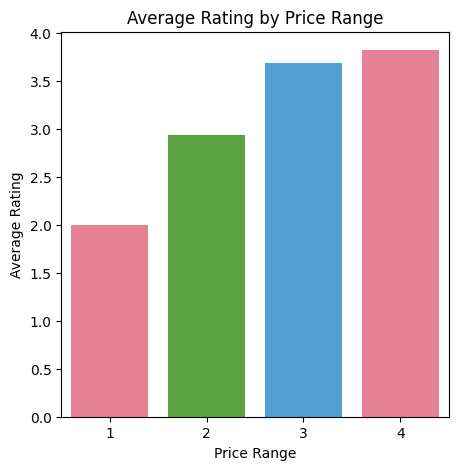

In [35]:
plt.figure(figsize=(5, 5))
sns.barplot(x=ar_byprice.index, y=ar_byprice.values, palette='husl', hue=ar_byprice.index, legend=False)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()


### step 6: identifying color which represents highest average rating among price ranges

In [37]:
rating_coloranalysis = df.groupby('Price range').agg({'Aggregate rating' : 'mean',
                        'Rating color' : lambda x : x.mode().iloc[0] 
                        if not x.mode().empty else 'unknown'}).round(2)

In [ ]:
highest_rating = rating_coloranalysis['Aggregate rating'].max()
highest_rating_range = rating_coloranalysis[rating_coloranalysis['Aggregate rating'] == highest_rating].index[0]
print("\nHighest average rating is in Price Range:", highest_rating_range, "with a rating of", highest_rating)


Highest average rating is in Price Range: Aggregate rating    4
Rating color        4
dtype: int64 with a rating of 3.82


In [47]:
print("color representing highest average rating:")

highest_rating_range_df = rating_coloranalysis.loc[[rating_coloranalysis['Aggregate rating'].idxmax()]]
print(highest_rating_range_df[['Aggregate rating', 'Rating color']])



color representing highest average rating:
             Aggregate rating Rating color
Price range                               
4                        3.82       Yellow


### end of task 2: level 2